This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# The mathematical building blocks of neural networks

## A first look at a neural network

**Loading the MNIST dataset in Keras**

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
train_images.shape

(60000, 28, 28)

Image of a hand-written number  5


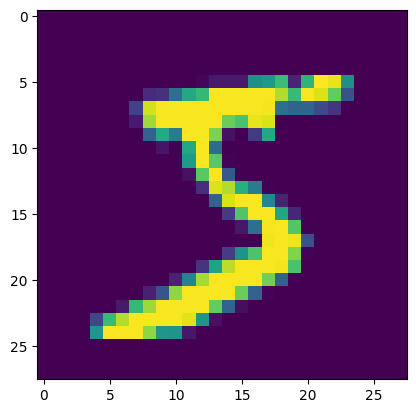

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(train_images[0])
print('Image of a hand-written number ', train_labels[0])

Image of a hand-written number  0


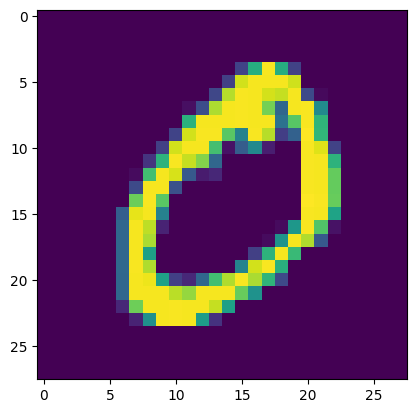

In [ ]:
plt.figure()
plt.imshow(train_images[1])
print('Image of a hand-written number ', train_labels[1])

In [ ]:
for row in train_images[1]:
  for pixel in row:
    print(pixel, end=' ')
  print('\n')

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 51 159 253 159 50 0 0 0 0 0 0 0 0 

0 0 0 0 0 0 0 0 0 0 0 0 0 0 48 238 252 252 252 237 0 0 0 0 0 0 0 0 

0 0 0 0 0 0 0 0 0 0 0 0 0 54 227 253 252 239 233 252 57 6 0 0 0 0 0 0 

0 0 0 0 0 0 0 0 0 0 0 10 60 224 252 253 252 202 84 252 253 122 0 0 0 0 0 0 

0 0 0 0 0 0 0 0 0 0 0 163 252 252 252 253 252 252 96 189 253 167 0 0 0 0 0 0 

0 0 0 0 0 0 0 0 0 0 51 238 253 253 190 114 253 228 47 79 255 168 0 0 0 0 0 0 

0 0 0 0 0 0 0 0 0 48 238 252 252 179 12 75 121 21 0 0 253 243 50 0 0 0 0 0 

0 0 0 0 0 0 0 0 38 165 253 233 208 84 0 0 0 0 0 0 253 252 165 0 0 0 0 0 

0 0 0 0 0 0 0 7 178 252 240 71 19 28 0 0 0 0 0 0 253 252 195 0 0 0 0 0 

0 0 0 0 0 0 0 57 252 252 63 0 0 0 0 0 0 0 0 0 253 252 195 0 0 0 0 0 

0 0 0 0 0 0 0 198 253 190 0 0 0 

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

In [ ]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

Image of a hand-written number  7


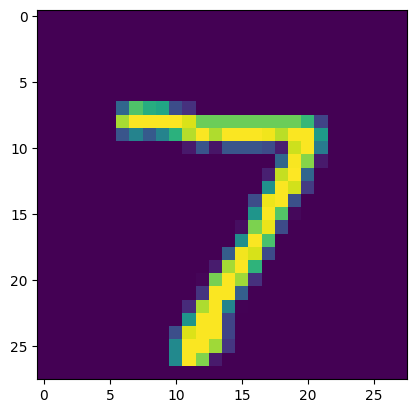

In [ ]:
plt.figure()
plt.imshow(test_images[0])
print('Image of a hand-written number ', test_labels[0])

**The network architecture**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

**The compilation step**

In [ ]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

**Preparing the image data**

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

**"Fitting" the model**

In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

Epoch 1/5
469/469 [==============================] - 8s 16ms/step - loss: 0.2288 - accuracy: 0.9306
Epoch 2/5
469/469 [==============================] - 9s 19ms/step - loss: 0.0851 - accuracy: 0.9741
Epoch 3/5
469/469 [==============================] - 7s 16ms/step - loss: 0.0544 - accuracy: 0.9827
Epoch 4/5
469/469 [==============================] - 9s 19ms/step - loss: 0.0385 - accuracy: 0.9874
Epoch 5/5
313/313 [==============================] - 2s 4ms/step - loss: 0.0858 - accuracy: 0.9759
test_acc: 0.9758999943733215


# Original Model - Confusion Matrix

313/313 [==============================] - 3s 7ms/step


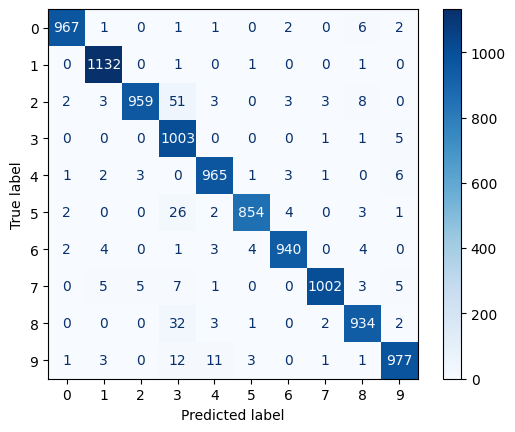

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Make predictions on the test data
predictions = model.predict(test_images)

# Convert the predicted probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(test_labels, predicted_labels)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Testing epochs

**5 epoch model**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

model.fit(train_images, train_labels, epochs=5, batch_size=128)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")




11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/5
469/469 [==============================] - 13s 23ms/step - loss: 0.2291 - accuracy: 0.9293
Epoch 2/5
469/469 [==============================] - 7s 15ms/step - loss: 0.0834 - accuracy: 0.9748
Epoch 3/5
469/469 [==============================] - 6s 12ms/step - loss: 0.0544 - accuracy: 0.9829
Epoch 4/5
469/469 [==============================] - 7s 16ms/step - loss: 0.0379 - accuracy: 0.9872
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.1067 - accuracy: 0.9718
test_acc: 0.9718000292778015


**10 epoch model - 98.3% accuracy**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

model.fit(train_images, train_labels, epochs=10, batch_size=128)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")




Epoch 1/10
469/469 [==============================] - 15s 28ms/step - loss: 0.2322 - accuracy: 0.9288
Epoch 2/10
469/469 [==============================] - 11s 24ms/step - loss: 0.0836 - accuracy: 0.9748
Epoch 3/10
469/469 [==============================] - 11s 23ms/step - loss: 0.0550 - accuracy: 0.9829
Epoch 4/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0365 - accuracy: 0.9890
Epoch 5/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0273 - accuracy: 0.9911
Epoch 6/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0197 - accuracy: 0.9936
Epoch 7/10
469/469 [==============================] - 9s 18ms/step - loss: 0.0148 - accuracy: 0.9952
Epoch 8/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0108 - accuracy: 0.9964
Epoch 9/10
469/469 [==============================] - 9s 19ms/step - loss: 0.0096 - accuracy: 0.9970
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss: 0.0751 - accu

**15 epoch model**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

model.fit(train_images, train_labels, epochs=15, batch_size=128)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

Epoch 1/15
469/469 [==============================] - 15s 29ms/step - loss: 0.2318 - accuracy: 0.9284
Epoch 2/15
469/469 [==============================] - 11s 23ms/step - loss: 0.0841 - accuracy: 0.9738
Epoch 3/15
469/469 [==============================] - 11s 23ms/step - loss: 0.0537 - accuracy: 0.9829
Epoch 4/15
469/469 [==============================] - 7s 15ms/step - loss: 0.0385 - accuracy: 0.9877
Epoch 5/15
469/469 [==============================] - 6s 13ms/step - loss: 0.0278 - accuracy: 0.9910
Epoch 6/15
469/469 [==============================] - 7s 16ms/step - loss: 0.0195 - accuracy: 0.9938
Epoch 7/15
469/469 [==============================] - 6s 13ms/step - loss: 0.0147 - accuracy: 0.9948
Epoch 8/15
469/469 [==============================] - 7s 16ms/step - loss: 0.0118 - accuracy: 0.9962
Epoch 9/15
469/469 [==============================] - 6s 13ms/step - loss: 0.0093 - accuracy: 0.9971
Epoch 10/15
469/469 [==============================] - 7s 16ms/step - loss: 0.0065 - acc

**25 epoch model**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

model.fit(train_images, train_labels, epochs=25, batch_size=128)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

Epoch 1/25
469/469 [==============================] - 14s 29ms/step - loss: 0.2283 - accuracy: 0.9291
Epoch 2/25
469/469 [==============================] - 12s 25ms/step - loss: 0.0829 - accuracy: 0.9742
Epoch 3/25
469/469 [==============================] - 12s 25ms/step - loss: 0.0539 - accuracy: 0.9829
Epoch 4/25
469/469 [==============================] - 9s 18ms/step - loss: 0.0372 - accuracy: 0.9890
Epoch 5/25
469/469 [==============================] - 8s 17ms/step - loss: 0.0266 - accuracy: 0.9918
Epoch 6/25
469/469 [==============================] - 7s 15ms/step - loss: 0.0201 - accuracy: 0.9934
Epoch 7/25
469/469 [==============================] - 8s 16ms/step - loss: 0.0174 - accuracy: 0.9943
Epoch 8/25
469/469 [==============================] - 8s 16ms/step - loss: 0.0127 - accuracy: 0.9961
Epoch 9/25
469/469 [==============================] - 7s 16ms/step - loss: 0.0084 - accuracy: 0.9973
Epoch 10/25
469/469 [==============================] - 6s 13ms/step - loss: 0.0065 - acc

**30 epochs**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

model.fit(train_images, train_labels, epochs=30, batch_size=128)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

Epoch 1/30
469/469 [==============================] - 15s 29ms/step - loss: 0.2287 - accuracy: 0.9298
Epoch 2/30
469/469 [==============================] - 11s 24ms/step - loss: 0.0828 - accuracy: 0.9740
Epoch 3/30
469/469 [==============================] - 13s 27ms/step - loss: 0.0538 - accuracy: 0.9831
Epoch 4/30
469/469 [==============================] - 8s 17ms/step - loss: 0.0375 - accuracy: 0.9878
Epoch 5/30
469/469 [==============================] - 8s 18ms/step - loss: 0.0265 - accuracy: 0.9916
Epoch 6/30
469/469 [==============================] - 7s 14ms/step - loss: 0.0206 - accuracy: 0.9934
Epoch 7/30
469/469 [==============================] - 9s 20ms/step - loss: 0.0148 - accuracy: 0.9954
Epoch 8/30
469/469 [==============================] - 7s 14ms/step - loss: 0.0120 - accuracy: 0.9960
Epoch 9/30
469/469 [==============================] - 8s 17ms/step - loss: 0.0091 - accuracy: 0.9971
Epoch 10/30
469/469 [==============================] - 7s 14ms/step - loss: 0.0069 - acc

# Testing Number of Layers

**3 layers**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

model.fit(train_images, train_labels, epochs=10, batch_size=128)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")




Epoch 1/10
469/469 [==============================] - 20s 41ms/step - loss: 0.2399 - accuracy: 0.9251
Epoch 2/10
469/469 [==============================] - 16s 34ms/step - loss: 0.0866 - accuracy: 0.9732
Epoch 3/10
469/469 [==============================] - 9s 20ms/step - loss: 0.0567 - accuracy: 0.9831
Epoch 4/10
469/469 [==============================] - 10s 21ms/step - loss: 0.0407 - accuracy: 0.9876
Epoch 5/10
469/469 [==============================] - 9s 19ms/step - loss: 0.0317 - accuracy: 0.9900
Epoch 6/10
469/469 [==============================] - 9s 19ms/step - loss: 0.0239 - accuracy: 0.9920
Epoch 7/10
469/469 [==============================] - 10s 21ms/step - loss: 0.0184 - accuracy: 0.9941
Epoch 8/10
469/469 [==============================] - 10s 21ms/step - loss: 0.0150 - accuracy: 0.9952
Epoch 9/10
469/469 [==============================] - 8s 18ms/step - loss: 0.0125 - accuracy: 0.9962
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss: 0.1102 - ac

**4 layers**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

model.fit(train_images, train_labels, epochs=10, batch_size=128)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")




Epoch 1/10
469/469 [==============================] - 24s 47ms/step - loss: 0.2719 - accuracy: 0.9150
Epoch 2/10
469/469 [==============================] - 12s 25ms/step - loss: 0.0957 - accuracy: 0.9718
Epoch 3/10
469/469 [==============================] - 12s 25ms/step - loss: 0.0633 - accuracy: 0.9813
Epoch 4/10
469/469 [==============================] - 12s 25ms/step - loss: 0.0479 - accuracy: 0.9855
Epoch 5/10
469/469 [==============================] - 11s 24ms/step - loss: 0.0359 - accuracy: 0.9888
Epoch 6/10
469/469 [==============================] - 12s 26ms/step - loss: 0.0284 - accuracy: 0.9914
Epoch 7/10
469/469 [==============================] - 12s 26ms/step - loss: 0.0240 - accuracy: 0.9925
Epoch 8/10
469/469 [==============================] - 13s 28ms/step - loss: 0.0175 - accuracy: 0.9947
Epoch 9/10
469/469 [==============================] - 12s 26ms/step - loss: 0.0150 - accuracy: 0.9955
Epoch 10/10
313/313 [==============================] - 1s 4ms/step - loss: 0.0754 

**5 layers**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

model.fit(train_images, train_labels, epochs=10, batch_size=128)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")




Epoch 1/10
469/469 [==============================] - 29s 56ms/step - loss: 0.3159 - accuracy: 0.9031
Epoch 2/10
469/469 [==============================] - 19s 41ms/step - loss: 0.1064 - accuracy: 0.9693
Epoch 3/10
469/469 [==============================] - 15s 32ms/step - loss: 0.0699 - accuracy: 0.9800
Epoch 4/10
469/469 [==============================] - 15s 31ms/step - loss: 0.0504 - accuracy: 0.9847
Epoch 5/10
469/469 [==============================] - 15s 31ms/step - loss: 0.0379 - accuracy: 0.9887
Epoch 6/10
469/469 [==============================] - 15s 31ms/step - loss: 0.0295 - accuracy: 0.9912
Epoch 7/10
469/469 [==============================] - 15s 31ms/step - loss: 0.0243 - accuracy: 0.9930
Epoch 8/10
469/469 [==============================] - 17s 36ms/step - loss: 0.0193 - accuracy: 0.9940
Epoch 9/10
469/469 [==============================] - 15s 31ms/step - loss: 0.0163 - accuracy: 0.9954
Epoch 10/10
313/313 [==============================] - 1s 4ms/step - loss: 0.1007 

**6 layers**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

model.fit(train_images, train_labels, epochs=10, batch_size=128)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")




Epoch 1/10
469/469 [==============================] - 34s 67ms/step - loss: 0.3573 - accuracy: 0.8906
Epoch 2/10
469/469 [==============================] - 17s 36ms/step - loss: 0.1145 - accuracy: 0.9679
Epoch 3/10
469/469 [==============================] - 18s 39ms/step - loss: 0.0782 - accuracy: 0.9779
Epoch 4/10
469/469 [==============================] - 17s 36ms/step - loss: 0.0552 - accuracy: 0.9843
Epoch 5/10
469/469 [==============================] - 18s 39ms/step - loss: 0.0430 - accuracy: 0.9874
Epoch 6/10
469/469 [==============================] - 18s 38ms/step - loss: 0.0330 - accuracy: 0.9907
Epoch 7/10
469/469 [==============================] - 18s 38ms/step - loss: 0.0280 - accuracy: 0.9923
Epoch 8/10
469/469 [==============================] - 17s 36ms/step - loss: 0.0232 - accuracy: 0.9935
Epoch 9/10
469/469 [==============================] - 19s 41ms/step - loss: 0.0198 - accuracy: 0.9945
Epoch 10/10
313/313 [==============================] - 2s 5ms/step - loss: 0.1036 

**7 layers**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

model.fit(train_images, train_labels, epochs=10, batch_size=128)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")




Epoch 1/10
469/469 [==============================] - 21s 42ms/step - loss: 0.4008 - accuracy: 0.8803
Epoch 2/10
469/469 [==============================] - 20s 43ms/step - loss: 0.1272 - accuracy: 0.9659
Epoch 3/10
469/469 [==============================] - 20s 44ms/step - loss: 0.0836 - accuracy: 0.9768
Epoch 4/10
469/469 [==============================] - 20s 43ms/step - loss: 0.0605 - accuracy: 0.9831
Epoch 5/10
469/469 [==============================] - 19s 40ms/step - loss: 0.0487 - accuracy: 0.9869
Epoch 6/10
469/469 [==============================] - 20s 43ms/step - loss: 0.0371 - accuracy: 0.9897
Epoch 7/10
469/469 [==============================] - 20s 44ms/step - loss: 0.0311 - accuracy: 0.9917
Epoch 8/10
469/469 [==============================] - 20s 43ms/step - loss: 0.0249 - accuracy: 0.9929
Epoch 9/10
469/469 [==============================] - 19s 40ms/step - loss: 0.0221 - accuracy: 0.9940
Epoch 10/10
313/313 [==============================] - 2s 5ms/step - loss: 0.0923 

# Expiramenting with Layers (Relu, tanh, sigmoid)

**3 relu layers + 10 epochs**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
tenEpochThreeLayerModel = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

tenEpochThreeLayerModel.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

tenEpochThreeLayerModel.fit(train_images, train_labels, epochs=10, batch_size=128)
test_loss, test_acc = tenEpochThreeLayerModel.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")




Epoch 1/10
469/469 [==============================] - 12s 23ms/step - loss: 2.3017 - accuracy: 0.1122
Epoch 2/10
469/469 [==============================] - 11s 24ms/step - loss: 2.3015 - accuracy: 0.1124
Epoch 3/10
469/469 [==============================] - 12s 25ms/step - loss: 2.3014 - accuracy: 0.1124
Epoch 4/10
469/469 [==============================] - 12s 25ms/step - loss: 2.3014 - accuracy: 0.1124
Epoch 5/10
469/469 [==============================] - 12s 25ms/step - loss: 2.3014 - accuracy: 0.1124
Epoch 6/10
469/469 [==============================] - 11s 24ms/step - loss: 2.3014 - accuracy: 0.1124
Epoch 7/10
469/469 [==============================] - 11s 23ms/step - loss: 2.3013 - accuracy: 0.1124
Epoch 8/10
469/469 [==============================] - 12s 25ms/step - loss: 2.3013 - accuracy: 0.1124
Epoch 9/10
469/469 [==============================] - 12s 26ms/step - loss: 2.3013 - accuracy: 0.1124
Epoch 10/10
313/313 [==============================] - 2s 4ms/step - loss: 2.3012 

**2 relu + 1 tanh + 10 epochs**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
tenEpochThreeLayerModel = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="tanh"),
    layers.Dense(10, activation="softmax")
])

tenEpochThreeLayerModel.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

tenEpochThreeLayerModel.fit(train_images, train_labels, epochs=10, batch_size=128)
test_loss, test_acc = tenEpochThreeLayerModel.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")


Epoch 1/10
469/469 [==============================] - 17s 34ms/step - loss: 0.2334 - accuracy: 0.9280
Epoch 2/10
469/469 [==============================] - 14s 30ms/step - loss: 0.0845 - accuracy: 0.9733
Epoch 3/10
469/469 [==============================] - 11s 25ms/step - loss: 0.0555 - accuracy: 0.9829
Epoch 4/10
469/469 [==============================] - 17s 35ms/step - loss: 0.0399 - accuracy: 0.9874
Epoch 5/10
469/469 [==============================] - 12s 25ms/step - loss: 0.0281 - accuracy: 0.9908
Epoch 6/10
469/469 [==============================] - 13s 27ms/step - loss: 0.0223 - accuracy: 0.9931
Epoch 7/10
469/469 [==============================] - 12s 25ms/step - loss: 0.0156 - accuracy: 0.9949
Epoch 8/10
469/469 [==============================] - 10s 22ms/step - loss: 0.0133 - accuracy: 0.9959
Epoch 9/10
469/469 [==============================] - 12s 25ms/step - loss: 0.0124 - accuracy: 0.9960
Epoch 10/10
313/313 [==============================] - 1s 4ms/step - loss: 0.0809 

**2 relu + 2 tanh + 10 epochs**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="tanh"),
    layers.Dense(512, activation="tanh"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

model.fit(train_images, train_labels, epochs=10, batch_size=128)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")


Epoch 1/10
469/469 [==============================] - 15s 31ms/step - loss: 0.2480 - accuracy: 0.9227
Epoch 2/10
469/469 [==============================] - 15s 31ms/step - loss: 0.0917 - accuracy: 0.9722
Epoch 3/10
469/469 [==============================] - 15s 31ms/step - loss: 0.0608 - accuracy: 0.9809
Epoch 4/10
469/469 [==============================] - 14s 31ms/step - loss: 0.0448 - accuracy: 0.9862
Epoch 5/10
469/469 [==============================] - 15s 31ms/step - loss: 0.0318 - accuracy: 0.9902
Epoch 6/10
469/469 [==============================] - 16s 34ms/step - loss: 0.0254 - accuracy: 0.9918
Epoch 7/10
469/469 [==============================] - 15s 31ms/step - loss: 0.0193 - accuracy: 0.9936
Epoch 8/10
469/469 [==============================] - 15s 31ms/step - loss: 0.0173 - accuracy: 0.9946
Epoch 9/10
469/469 [==============================] - 14s 31ms/step - loss: 0.0150 - accuracy: 0.9952
Epoch 10/10
313/313 [==============================] - 2s 5ms/step - loss: 0.0687 

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="tanh"),
    layers.Dense(512, activation="tanh"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

model.fit(train_images, train_labels, epochs=10, batch_size=128)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")


Epoch 1/10
469/469 [==============================] - 24s 45ms/step - loss: 0.2556 - accuracy: 0.9216
Epoch 2/10
469/469 [==============================] - 18s 39ms/step - loss: 0.0921 - accuracy: 0.9725
Epoch 3/10
469/469 [==============================] - 11s 24ms/step - loss: 0.0623 - accuracy: 0.9813
Epoch 4/10
469/469 [==============================] - 11s 24ms/step - loss: 0.0433 - accuracy: 0.9863
Epoch 5/10
469/469 [==============================] - 12s 26ms/step - loss: 0.0317 - accuracy: 0.9905
Epoch 6/10
469/469 [==============================] - 12s 26ms/step - loss: 0.0241 - accuracy: 0.9927
Epoch 7/10
469/469 [==============================] - 12s 26ms/step - loss: 0.0195 - accuracy: 0.9937
Epoch 8/10
469/469 [==============================] - 12s 26ms/step - loss: 0.0163 - accuracy: 0.9947
Epoch 9/10
469/469 [==============================] - 12s 26ms/step - loss: 0.0135 - accuracy: 0.9954
Epoch 10/10
313/313 [==============================] - 1s 4ms/step - loss: 0.0918 

**3 relu + 3 tanh + 10 epochs**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="tanh"),
    layers.Dense(512, activation="tanh"),
    layers.Dense(512, activation="tanh"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

model.fit(train_images, train_labels, epochs=10, batch_size=128)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")


Epoch 1/10
469/469 [==============================] - 24s 44ms/step - loss: 0.3308 - accuracy: 0.9029
Epoch 2/10
469/469 [==============================] - 22s 46ms/step - loss: 0.1088 - accuracy: 0.9692
Epoch 3/10
469/469 [==============================] - 20s 42ms/step - loss: 0.0735 - accuracy: 0.9794
Epoch 4/10
469/469 [==============================] - 22s 47ms/step - loss: 0.0540 - accuracy: 0.9840
Epoch 5/10
469/469 [==============================] - 20s 42ms/step - loss: 0.0408 - accuracy: 0.9881
Epoch 6/10
469/469 [==============================] - 22s 47ms/step - loss: 0.0345 - accuracy: 0.9899
Epoch 7/10
469/469 [==============================] - 20s 43ms/step - loss: 0.0271 - accuracy: 0.9922
Epoch 8/10
469/469 [==============================] - 22s 46ms/step - loss: 0.0217 - accuracy: 0.9935
Epoch 9/10
469/469 [==============================] - 20s 43ms/step - loss: 0.0194 - accuracy: 0.9946
Epoch 10/10
313/313 [==============================] - 2s 6ms/step - loss: 0.0935 

**3 relu + 2 tanh + 10 epochs**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="tanh"),
    layers.Dense(512, activation="tanh"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

model.fit(train_images, train_labels, epochs=10, batch_size=128)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")


Epoch 1/10
469/469 [==============================] - 30s 59ms/step - loss: 0.2862 - accuracy: 0.9139
Epoch 2/10
469/469 [==============================] - 17s 37ms/step - loss: 0.1002 - accuracy: 0.9715
Epoch 3/10
469/469 [==============================] - 17s 36ms/step - loss: 0.0692 - accuracy: 0.9794
Epoch 4/10
469/469 [==============================] - 17s 37ms/step - loss: 0.0487 - accuracy: 0.9858
Epoch 5/10
469/469 [==============================] - 19s 40ms/step - loss: 0.0372 - accuracy: 0.9884
Epoch 6/10
469/469 [==============================] - 18s 38ms/step - loss: 0.0290 - accuracy: 0.9914
Epoch 7/10
469/469 [==============================] - 17s 37ms/step - loss: 0.0231 - accuracy: 0.9927
Epoch 8/10
469/469 [==============================] - 27s 58ms/step - loss: 0.0182 - accuracy: 0.9942
Epoch 9/10
469/469 [==============================] - 18s 39ms/step - loss: 0.0155 - accuracy: 0.9952
Epoch 10/10
313/313 [==============================] - 2s 6ms/step - loss: 0.0784 

**2 sigmoid**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

model = keras.Sequential([
    layers.Dense(512, activation="sigmoid"),
    layers.Dense(512, activation="sigmoid"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

model.fit(train_images, train_labels, epochs=10, batch_size=128)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")


Epoch 1/10
469/469 [==============================] - 15s 29ms/step - loss: 0.5890 - accuracy: 0.8198
Epoch 2/10
469/469 [==============================] - 11s 24ms/step - loss: 0.2653 - accuracy: 0.9203
Epoch 3/10
469/469 [==============================] - 13s 28ms/step - loss: 0.2020 - accuracy: 0.9395
Epoch 4/10
469/469 [==============================] - 8s 17ms/step - loss: 0.1575 - accuracy: 0.9525
Epoch 5/10
469/469 [==============================] - 9s 20ms/step - loss: 0.1271 - accuracy: 0.9615
Epoch 6/10
469/469 [==============================] - 7s 16ms/step - loss: 0.1056 - accuracy: 0.9686
Epoch 7/10
469/469 [==============================] - 8s 16ms/step - loss: 0.0886 - accuracy: 0.9732
Epoch 8/10
469/469 [==============================] - 7s 16ms/step - loss: 0.0765 - accuracy: 0.9760
Epoch 9/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0653 - accuracy: 0.9799
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss: 0.0803 - accu

# Expiramenting with Learning Rate

**2 relu + 2 tanh + learning rate 0.0001 + 10 epochs**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="tanh"),
    layers.Dense(512, activation="tanh"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.0001),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

model.fit(train_images, train_labels, epochs=10, batch_size=128)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 39ms/step - accuracy: 0.8292 - loss: 0.6683
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 29s 59ms/step - accuracy: 0.9538 - loss: 0.1626
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 29s 33ms/step - accuracy: 0.9694 - loss: 0.1043
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.9790 - loss: 0.0732
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.9835 - loss: 0.0551
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.9884 - loss: 0.0396
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 22s 38ms/step - accuracy: 0.9918 - loss: 0.0310
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.9934 - loss: 0.0243
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.9956 - loss: 0.0171
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.9974 - loss: 0.0110
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9744 - loss: 0.0904
test_acc: 0.979200005531311


**2 relu + 2 tanh + learning = 0.01 + 10 epochs**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="tanh"),
    layers.Dense(512, activation="tanh"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.01),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

model.fit(train_images, train_labels, epochs=10, batch_size=128)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")


Epoch 1/10
469/469 [==============================] - 24s 47ms/step - loss: 5.3464 - accuracy: 0.1002
Epoch 2/10
469/469 [==============================] - 21s 45ms/step - loss: 5.2079 - accuracy: 0.0973
Epoch 3/10
469/469 [==============================] - 14s 30ms/step - loss: 5.1173 - accuracy: 0.1021
Epoch 4/10
469/469 [==============================] - 15s 33ms/step - loss: 5.1778 - accuracy: 0.0986
Epoch 5/10
469/469 [==============================] - 13s 27ms/step - loss: 5.1656 - accuracy: 0.1005
Epoch 6/10
469/469 [==============================] - 13s 27ms/step - loss: 5.1329 - accuracy: 0.1035
Epoch 7/10
469/469 [==============================] - 13s 27ms/step - loss: 5.1564 - accuracy: 0.0985
Epoch 8/10
469/469 [==============================] - 14s 29ms/step - loss: 5.1470 - accuracy: 0.1021
Epoch 9/10
469/469 [==============================] - 13s 27ms/step - loss: 5.1193 - accuracy: 0.1006
Epoch 10/10
313/313 [==============================] - 1s 4ms/step - loss: 6.6485 

**2 tanh + 2 rely + 0.001 learning rate**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="tanh"),
    layers.Dense(512, activation="tanh"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.001),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

model.fit(train_images, train_labels, epochs=10, batch_size=128)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 32ms/step - accuracy: 0.8455 - loss: 0.4957
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.9706 - loss: 0.0974
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 33ms/step - accuracy: 0.9811 - loss: 0.0613
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.9858 - loss: 0.0426
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.9905 - loss: 0.0300
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.9929 - loss: 0.0220
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.9946 - loss: 0.0177
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 31ms/step - accuracy: 0.9943 - loss: 0.0171
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 32ms/step - accuracy: 0.9959 - loss: 0.0127
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 32ms/step - accuracy: 0.9967 - loss: 0.0105
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9781 - loss: 0.1095
test_acc: 0.9815999865531921


# Adam optimizer (+ learning rates)

**adam optimizer + 2 relu + 2 tanh + 10 epochs**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="tanh"),
    layers.Dense(512, activation="tanh"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

model.fit(train_images, train_labels, epochs=10, batch_size=128)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 33ms/step - accuracy: 0.6700 - loss: 0.9357
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 33ms/step - accuracy: 0.9398 - loss: 0.2007
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.9587 - loss: 0.1379
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 33ms/step - accuracy: 0.9673 - loss: 0.1062
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 33ms/step - accuracy: 0.9743 - loss: 0.0837
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 35ms/step - accuracy: 0.9776 - loss: 0.0710
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 37ms/step - accuracy: 0.9801 - loss: 0.0629
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 33ms/step - accuracy: 0.9836 - loss: 0.0528
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.9845 - loss: 0.0474
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 24s 44ms/step - accuracy: 0.9850 - loss: 0.0439
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9738 - loss: 0.0937
test_acc: 0.9779999852180481


**optimizer = adam + learning rate = 0.0001 + 2 relu + 2 tanh + 10 epochs**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="tanh"),
    layers.Dense(512, activation="tanh"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

model.fit(train_images, train_labels, epochs=10, batch_size=128)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 23s 42ms/step - accuracy: 0.1109 - loss: 2.3017
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.1122 - loss: 2.3013
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 35ms/step - accuracy: 0.1109 - loss: 2.3015
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 34ms/step - accuracy: 0.1114 - loss: 2.3015
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.1112 - loss: 2.3015
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 35ms/step - accuracy: 0.1133 - loss: 2.3010
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.1295 - loss: 2.2850
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 34ms/step - accuracy: 0.2709 - loss: 1.9176
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 37ms/step - accuracy: 0.2944 - loss: 1.8257
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 43ms/step - accuracy: 0.3051 - loss: 1.8005
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3204 - loss: 1.7632
test_acc: 0.3203999996185303


**obtimizer = adam + learning rate = 0.01 + 2 relu + 2 tanh + 10 epochs**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="tanh"),
    layers.Dense(512, activation="tanh"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

model.fit(train_images, train_labels, epochs=10, batch_size=128)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 31s 58ms/step - accuracy: 0.1042 - loss: 2.3486
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 32s 39ms/step - accuracy: 0.1098 - loss: 2.3043
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 42ms/step - accuracy: 0.1097 - loss: 2.3043
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - accuracy: 0.1069 - loss: 2.3098
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 22s 44ms/step - accuracy: 0.1062 - loss: 2.3065
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 32s 68ms/step - accuracy: 0.1035 - loss: 2.3172
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 32s 49ms/step - accuracy: 0.1052 - loss: 2.3092
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 44s 55ms/step - accuracy: 0.1029 - loss: 2.3222
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 43ms/step - accuracy: 0.1039 - loss: 2.3097
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 43ms/step - accuracy: 0.1056 - loss: 2.3074
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.1160 - loss: 2.3031
test_acc: 0.11349999904632568


**adam optimizer + 0.001 learning rate**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="tanh"),
    layers.Dense(512, activation="tanh"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

model.fit(train_images, train_labels, epochs=10, batch_size=128)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 29s 52ms/step - accuracy: 0.8858 - loss: 0.3668
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 38ms/step - accuracy: 0.9727 - loss: 0.0873
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 38ms/step - accuracy: 0.9818 - loss: 0.0593
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 38ms/step - accuracy: 0.9858 - loss: 0.0443
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 38ms/step - accuracy: 0.9892 - loss: 0.0341
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.9904 - loss: 0.0295
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 28s 59ms/step - accuracy: 0.9909 - loss: 0.0279
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 31s 38ms/step - accuracy: 0.9931 - loss: 0.0216
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 37ms/step - accuracy: 0.9928 - loss: 0.0220
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 22s 39ms/step - accuracy: 0.9939 - loss: 0.0199
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9784 - loss: 0.1020
test_acc: 0.9817000031471252


# SGD optimizer

**SGD optimizer + learning rates**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="tanh"),
    layers.Dense(512, activation="tanh"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer="sgd",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

model.fit(train_images, train_labels, epochs=10, batch_size=128)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 26s 51ms/step - accuracy: 0.6522 - loss: 1.4218
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 30s 27ms/step - accuracy: 0.8936 - loss: 0.3831
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - accuracy: 0.9162 - loss: 0.2916
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 29ms/step - accuracy: 0.9275 - loss: 0.2513
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 29ms/step - accuracy: 0.9363 - loss: 0.2199
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - accuracy: 0.9435 - loss: 0.2005
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - accuracy: 0.9487 - loss: 0.1803
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - accuracy: 0.9527 - loss: 0.1642
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.9561 - loss: 0.1530
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.9600 - loss: 0.1362
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9481 - loss: 0.1688
test_acc: 0.9569000005722046


# Changing the epochs

**15 epochs**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="tanh"),
    layers.Dense(512, activation="tanh"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

model.fit(train_images, train_labels, epochs=15, batch_size=128)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")


Epoch 1/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 36s 64ms/step - accuracy: 0.8504 - loss: 0.4833
Epoch 2/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.9710 - loss: 0.0946
Epoch 3/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 37ms/step - accuracy: 0.9823 - loss: 0.0597
Epoch 4/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 37ms/step - accuracy: 0.9872 - loss: 0.0415
Epoch 5/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.9899 - loss: 0.0321
Epoch 6/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 38ms/step - accuracy: 0.9927 - loss: 0.0222
Epoch 7/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - accuracy: 0.9939 - loss: 0.0180
Epoch 8/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 38ms/step - accuracy: 0.9954 - loss: 0.0147
Epoch 9/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 38ms/step - accuracy: 0.9956 - loss: 0.0135
Epoch 10/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 22s 41ms/step - accuracy: 0.9969 - loss: 0.0092
Epoch 11/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 38ms/step - accuracy: 0.9967 - loss: 0.0102
Epoch 12/15
469/469 ━━━━━━━━━━

**10 epochs**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="tanh"),
    layers.Dense(512, activation="tanh"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

model.fit(train_images, train_labels, epochs=10, batch_size=128)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 77ms/step - accuracy: 0.8500 - loss: 0.4689
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 37ms/step - accuracy: 0.9715 - loss: 0.0925
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 37ms/step - accuracy: 0.9822 - loss: 0.0584
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - accuracy: 0.9869 - loss: 0.0408
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 38ms/step - accuracy: 0.9906 - loss: 0.0288
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 39ms/step - accuracy: 0.9931 - loss: 0.0214
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 37ms/step - accuracy: 0.9935 - loss: 0.0198
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 37ms/step - accuracy: 0.9951 - loss: 0.0149
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 22s 41ms/step - accuracy: 0.9960 - loss: 0.0127
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 37ms/step - accuracy: 0.9964 - loss: 0.0107
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9803 - loss: 0.1014
test_acc: 0.9833999872207642


# Adjusting the batch size

**batch size = 64**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="tanh"),
    layers.Dense(512, activation="tanh"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

model.fit(train_images, train_labels, epochs=10, batch_size=64)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 44s 40ms/step - accuracy: 0.8712 - loss: 0.4244
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 26s 28ms/step - accuracy: 0.9704 - loss: 0.1002
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 42s 29ms/step - accuracy: 0.9802 - loss: 0.0644
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 28s 30ms/step - accuracy: 0.9854 - loss: 0.0479
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 30ms/step - accuracy: 0.9894 - loss: 0.0353
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 40s 29ms/step - accuracy: 0.9920 - loss: 0.0289
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 29ms/step - accuracy: 0.9924 - loss: 0.0251
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 27s 29ms/step - accuracy: 0.9950 - loss: 0.0162
Epoch 9/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 33s 35ms/step - accuracy: 0.9959 - loss: 0.0137
Epoch 10/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 35s 29ms/step - accuracy: 0.9954 - loss: 0.0149
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9814 - loss: 0.1000
test_acc: 0.9837999939918518


**batch size = 256**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="tanh"),
    layers.Dense(512, activation="tanh"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

model.fit(train_images, train_labels, epochs=10, batch_size=256)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")


Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 103ms/step - accuracy: 0.8008 - loss: 0.6408
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 14s 58ms/step - accuracy: 0.9668 - loss: 0.1030
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 21s 59ms/step - accuracy: 0.9821 - loss: 0.0572
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 15s 62ms/step - accuracy: 0.9870 - loss: 0.0409
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 14s 61ms/step - accuracy: 0.9914 - loss: 0.0279
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 20s 61ms/step - accuracy: 0.9936 - loss: 0.0201
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - accuracy: 0.9950 - loss: 0.0164
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 21s 57ms/step - accuracy: 0.9957 - loss: 0.0135
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 21s 61ms/step - accuracy: 0.9964 - loss: 0.0097
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 15s 62ms/step - accuracy: 0.9975 - loss: 0.0085
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9785 - loss: 0.1077
test_acc: 0.9815999865531921


**batch size = 32**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="tanh"),
    layers.Dense(512, activation="tanh"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

model.fit(train_images, train_labels, epochs=10, batch_size=32)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 31ms/step - accuracy: 0.8853 - loss: 0.3764
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 71s 25ms/step - accuracy: 0.9684 - loss: 0.1121
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 25ms/step - accuracy: 0.9785 - loss: 0.0800
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 46s 25ms/step - accuracy: 0.9852 - loss: 0.0541
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 24ms/step - accuracy: 0.9882 - loss: 0.0438
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 25ms/step - accuracy: 0.9898 - loss: 0.0349
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 45s 24ms/step - accuracy: 0.9913 - loss: 0.0324
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 24ms/step - accuracy: 0.9936 - loss: 0.0235
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 24ms/step - accuracy: 0.9945 - loss: 0.0213
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 25ms/step - accuracy: 0.9959 - loss: 0.0170
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9790 - loss: 0.1178
test_acc: 0.98229998350

# Overall Model

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="tanh"),
    layers.Dense(512, activation="tanh"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.001),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

model.fit(train_images, train_labels, epochs=10, batch_size=64)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 42s 41ms/step - accuracy: 0.8793 - loss: 0.3981
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 0.9702 - loss: 0.0989
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 23s 24ms/step - accuracy: 0.9828 - loss: 0.0611
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 25ms/step - accuracy: 0.9863 - loss: 0.0457
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 57s 42ms/step - accuracy: 0.9885 - loss: 0.0378
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 25s 25ms/step - accuracy: 0.9926 - loss: 0.0243
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 48s 33ms/step - accuracy: 0.9935 - loss: 0.0215
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 37s 40ms/step - accuracy: 0.9946 - loss: 0.0174
Epoch 9/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 26s 24ms/step - accuracy: 0.9956 - loss: 0.0151
Epoch 10/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 46s 29ms/step - accuracy: 0.9962 - loss: 0.0138
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9778 - loss: 0.1110
test_acc: 0.9818000197410583


**15 epochs**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="tanh"),
    layers.Dense(512, activation="tanh"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

model.fit(train_images, train_labels, epochs=15, batch_size=64)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")


Epoch 1/15
938/938 [==============================] - 33s 33ms/step - loss: 0.2244 - accuracy: 0.9320
Epoch 2/15
938/938 [==============================] - 21s 22ms/step - loss: 0.0970 - accuracy: 0.9718
Epoch 3/15
938/938 [==============================] - 17s 18ms/step - loss: 0.0660 - accuracy: 0.9801
Epoch 4/15
938/938 [==============================] - 17s 19ms/step - loss: 0.0483 - accuracy: 0.9857
Epoch 5/15
938/938 [==============================] - 17s 18ms/step - loss: 0.0371 - accuracy: 0.9887
Epoch 6/15
938/938 [==============================] - 17s 18ms/step - loss: 0.0305 - accuracy: 0.9910
Epoch 7/15
938/938 [==============================] - 18s 20ms/step - loss: 0.0247 - accuracy: 0.9927
Epoch 8/15
938/938 [==============================] - 17s 18ms/step - loss: 0.0200 - accuracy: 0.9942
Epoch 9/15
938/938 [==============================] - 18s 20ms/step - loss: 0.0173 - accuracy: 0.9948
Epoch 10/15
938/938 [==============================] - 16s 17ms/step - loss: 0.014

**20 epochs**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="tanh"),
    layers.Dense(512, activation="tanh"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

model.fit(train_images, train_labels, epochs=20, batch_size=128)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")


Epoch 1/20
469/469 [==============================] - 25s 49ms/step - loss: 0.2508 - accuracy: 0.9228
Epoch 2/20
469/469 [==============================] - 22s 46ms/step - loss: 0.0913 - accuracy: 0.9719
Epoch 3/20
469/469 [==============================] - 12s 26ms/step - loss: 0.0603 - accuracy: 0.9815
Epoch 4/20
469/469 [==============================] - 12s 26ms/step - loss: 0.0426 - accuracy: 0.9868
Epoch 5/20
469/469 [==============================] - 12s 26ms/step - loss: 0.0322 - accuracy: 0.9898
Epoch 6/20
469/469 [==============================] - 12s 26ms/step - loss: 0.0250 - accuracy: 0.9918
Epoch 7/20
469/469 [==============================] - 12s 26ms/step - loss: 0.0208 - accuracy: 0.9935
Epoch 8/20
469/469 [==============================] - 12s 26ms/step - loss: 0.0158 - accuracy: 0.9951
Epoch 9/20
469/469 [==============================] - 12s 26ms/step - loss: 0.0140 - accuracy: 0.9959
Epoch 10/20
469/469 [==============================] - 13s 28ms/step - loss: 0.010

**25 epochs**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="tanh"),
    layers.Dense(512, activation="tanh"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

model.fit(train_images, train_labels, epochs=25, batch_size=64)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")


Epoch 1/25
938/938 [==============================] - 35s 33ms/step - loss: 0.2301 - accuracy: 0.9302
Epoch 2/25
938/938 [==============================] - 19s 20ms/step - loss: 0.0946 - accuracy: 0.9723
Epoch 3/25
938/938 [==============================] - 19s 20ms/step - loss: 0.0615 - accuracy: 0.9821
Epoch 4/25
938/938 [==============================] - 18s 19ms/step - loss: 0.0487 - accuracy: 0.9857
Epoch 5/25
938/938 [==============================] - 18s 19ms/step - loss: 0.0361 - accuracy: 0.9893
Epoch 6/25
938/938 [==============================] - 19s 20ms/step - loss: 0.0290 - accuracy: 0.9912
Epoch 7/25
938/938 [==============================] - 21s 22ms/step - loss: 0.0235 - accuracy: 0.9930
Epoch 8/25
938/938 [==============================] - 19s 20ms/step - loss: 0.0210 - accuracy: 0.9939
Epoch 9/25
938/938 [==============================] - 20s 22ms/step - loss: 0.0168 - accuracy: 0.9949
Epoch 10/25
938/938 [==============================] - 20s 21ms/step - loss: 0.014

In [1]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="tanh"),
    layers.Dense(512, activation="tanh"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

model.fit(train_images, train_labels, epochs=25, batch_size=64) # 64 batch size rerun
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")


Epoch 1/25
938/938 [==============================] - 33s 34ms/step - loss: 0.2292 - accuracy: 0.9312
Epoch 2/25
938/938 [==============================] - 24s 25ms/step - loss: 0.0940 - accuracy: 0.9722
Epoch 3/25
938/938 [==============================] - 20s 21ms/step - loss: 0.0655 - accuracy: 0.9806
Epoch 4/25
938/938 [==============================] - 19s 20ms/step - loss: 0.0492 - accuracy: 0.9856
Epoch 5/25
938/938 [==============================] - 19s 20ms/step - loss: 0.0366 - accuracy: 0.9892
Epoch 6/25
938/938 [==============================] - 18s 20ms/step - loss: 0.0296 - accuracy: 0.9918
Epoch 7/25
938/938 [==============================] - 18s 19ms/step - loss: 0.0246 - accuracy: 0.9926
Epoch 8/25
938/938 [==============================] - 18s 19ms/step - loss: 0.0211 - accuracy: 0.9937
Epoch 9/25
938/938 [==============================] - 19s 21ms/step - loss: 0.0164 - accuracy: 0.9951
Epoch 10/25
938/938 [==============================] - 18s 20ms/step - loss: 0.014

In [2]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="tanh"),
    layers.Dense(512, activation="tanh"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

model.fit(train_images, train_labels, epochs=25, batch_size=128) #128 batch size
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")


Epoch 1/25
469/469 [==============================] - 14s 27ms/step - loss: 0.2511 - accuracy: 0.9220
Epoch 2/25
469/469 [==============================] - 13s 27ms/step - loss: 0.0929 - accuracy: 0.9713
Epoch 3/25
469/469 [==============================] - 14s 30ms/step - loss: 0.0604 - accuracy: 0.9808
Epoch 4/25
469/469 [==============================] - 14s 30ms/step - loss: 0.0440 - accuracy: 0.9863
Epoch 5/25
469/469 [==============================] - 13s 27ms/step - loss: 0.0322 - accuracy: 0.9901
Epoch 6/25
469/469 [==============================] - 14s 31ms/step - loss: 0.0237 - accuracy: 0.9924
Epoch 7/25
469/469 [==============================] - 13s 28ms/step - loss: 0.0198 - accuracy: 0.9938
Epoch 8/25
469/469 [==============================] - 13s 28ms/step - loss: 0.0153 - accuracy: 0.9951
Epoch 9/25
469/469 [==============================] - 13s 28ms/step - loss: 0.0142 - accuracy: 0.9957
Epoch 10/25
469/469 [==============================] - 13s 28ms/step - loss: 0.010

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="tanh"),
    layers.Dense(512, activation="tanh"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

model.fit(train_images, train_labels, epochs=10, batch_size=128)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")


Epoch 1/10
469/469 [==============================] - 25s 49ms/step - loss: 0.2586 - accuracy: 0.9209
Epoch 2/10
469/469 [==============================] - 15s 33ms/step - loss: 0.0915 - accuracy: 0.9722
Epoch 3/10
469/469 [==============================] - 12s 26ms/step - loss: 0.0606 - accuracy: 0.9811
Epoch 4/10
469/469 [==============================] - 12s 25ms/step - loss: 0.0430 - accuracy: 0.9869
Epoch 5/10
469/469 [==============================] - 14s 30ms/step - loss: 0.0318 - accuracy: 0.9898
Epoch 6/10
469/469 [==============================] - 12s 25ms/step - loss: 0.0241 - accuracy: 0.9925
Epoch 7/10
469/469 [==============================] - 12s 26ms/step - loss: 0.0196 - accuracy: 0.9937
Epoch 8/10
469/469 [==============================] - 12s 27ms/step - loss: 0.0174 - accuracy: 0.9946
Epoch 9/10
469/469 [==============================] - 12s 27ms/step - loss: 0.0129 - accuracy: 0.9958
Epoch 10/10
313/313 [==============================] - 1s 4ms/step - loss: 0.0929 

**2 relu + 2 tanh + 1 linear**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="tanh"),
    layers.Dense(512, activation="tanh"),
    layers.Dense(512, activation = "linear"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

model.fit(train_images, train_labels, epochs=10, batch_size=128)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")


Epoch 1/10
209/469 [============>.................] - ETA: 7s - loss: 0.4558 - accuracy: 0.8644

KeyboardInterrupt: 

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="tanh"),
    layers.Dense(512, activation="tanh"),
    layers.Dense(512, activation = "linear"),
    layers.Dense(512, activation = "linear"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

model.fit(train_images, train_labels, epochs=10, batch_size=128)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")


Epoch 1/10
469/469 [==============================] - 40s 80ms/step - loss: 0.3459 - accuracy: 0.9025
Epoch 2/10
469/469 [==============================] - 17s 37ms/step - loss: 0.1214 - accuracy: 0.9648
Epoch 3/10
469/469 [==============================] - 17s 37ms/step - loss: 0.0797 - accuracy: 0.9771
Epoch 4/10
469/469 [==============================] - 18s 39ms/step - loss: 0.0555 - accuracy: 0.9831
Epoch 5/10
469/469 [==============================] - 17s 37ms/step - loss: 0.0441 - accuracy: 0.9872
Epoch 6/10
469/469 [==============================] - 17s 36ms/step - loss: 0.0353 - accuracy: 0.9898
Epoch 7/10
469/469 [==============================] - 20s 42ms/step - loss: 0.0274 - accuracy: 0.9919
Epoch 8/10
469/469 [==============================] - 18s 38ms/step - loss: 0.0240 - accuracy: 0.9931
Epoch 9/10
469/469 [==============================] - 17s 36ms/step - loss: 0.0193 - accuracy: 0.9942
Epoch 10/10
313/313 [==============================] - 2s 5ms/step - loss: 0.0793 

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
model = keras.Sequential([
    layers.Dense(512, activation="tanh"),
    layers.Dense(512, activation="tanh"),
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation = "linear"),
    layers.Dense(512, activation = "linear"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

model.fit(train_images, train_labels, epochs=10, batch_size=128)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")


Epoch 1/10
469/469 [==============================] - 35s 70ms/step - loss: 0.4075 - accuracy: 0.8789
Epoch 2/10
469/469 [==============================] - 19s 41ms/step - loss: 0.1585 - accuracy: 0.9547
Epoch 3/10
469/469 [==============================] - 17s 37ms/step - loss: 0.1109 - accuracy: 0.9668
Epoch 4/10
469/469 [==============================] - 17s 37ms/step - loss: 0.0834 - accuracy: 0.9761
Epoch 5/10
469/469 [==============================] - 19s 40ms/step - loss: 0.0665 - accuracy: 0.9800
Epoch 6/10
469/469 [==============================] - 17s 37ms/step - loss: 0.0565 - accuracy: 0.9837
Epoch 7/10
469/469 [==============================] - 18s 39ms/step - loss: 0.0463 - accuracy: 0.9863
Epoch 8/10
469/469 [==============================] - 19s 40ms/step - loss: 0.0371 - accuracy: 0.9895
Epoch 9/10
469/469 [==============================] - 19s 40ms/step - loss: 0.0323 - accuracy: 0.9903
Epoch 10/10
313/313 [==============================] - 2s 5ms/step - loss: 0.1128 

# Confusion Matrix

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


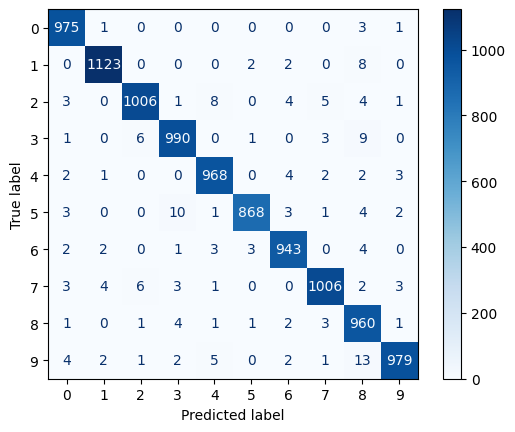

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Make predictions on the test data
predictions = model.predict(test_images)

# Convert the predicted probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(test_labels, predicted_labels)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap=plt.cm.Blues)
plt.show()

313/313 [==============================] - 5s 14ms/step


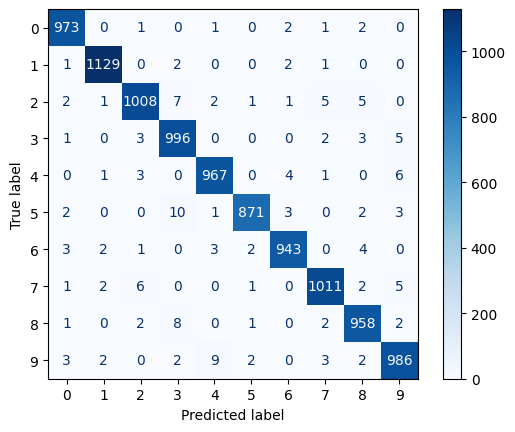

In [2]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Make predictions on the test data
predictions = model.predict(test_images)

# Convert the predicted probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(test_labels, predicted_labels)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap=plt.cm.Blues)
plt.show()

**Using the model to make predictions**

In [ ]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 [==============================] - 0s 102ms/step


array([1.3526715e-09, 1.1754625e-07, 9.6653393e-06, 4.6834437e-05,
       5.2629591e-13, 2.6594373e-09, 4.8590656e-13, 9.9994308e-01,
       2.6685493e-08, 1.9459107e-07], dtype=float32)

In [ ]:
sum(predictions[0])

0.9999999201764626

In [ ]:
predictions[0].argmax()

7

In [ ]:
predictions[0][7]

0.9999431

In [ ]:
test_labels[0]

7

**Evaluating the model on new data**

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 1s 4ms/step - loss: 0.0871 - accuracy: 0.9762
test_acc: 0.9761999845504761


## Data representations for neural networks

### Scalars (rank-0 tensors)

In [ ]:
import numpy as np
x = np.array(12)
x

array(12)

In [ ]:
x.ndim

0

### Vectors (rank-1 tensors)

In [ ]:
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [ ]:
x.ndim

1

### Matrices (rank-2 tensors)

In [ ]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x.ndim

2

### Rank-3 and higher-rank tensors

In [ ]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x.ndim

3

### Key attributes

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
train_images.ndim

3

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_images.dtype

dtype('uint8')

**Displaying the fourth digit**

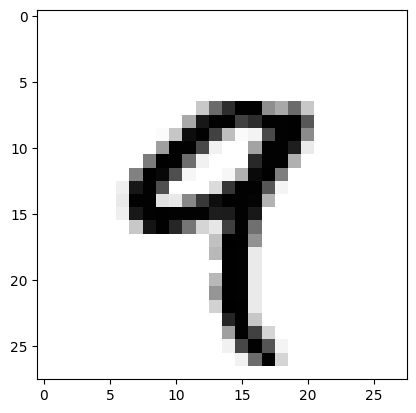

In [ ]:
import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [ ]:
train_labels[4]

9

### Manipulating tensors in NumPy

In [ ]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [ ]:
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [ ]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [ ]:
my_slice = train_images[:, 14:, 14:]

In [ ]:
my_slice = train_images[:, 7:-7, 7:-7]

### The notion of data batches

In [ ]:
batch = train_images[:128]

In [ ]:
batch = train_images[128:256]

In [ ]:
n = 3
batch = train_images[128 * n:128 * (n + 1)]

### Real-world examples of data tensors

### Vector data

### Timeseries data or sequence data

### Image data

### Video data

## The gears of neural networks: tensor operations

### Element-wise operations

In [ ]:
def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

In [ ]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

In [ ]:
import time

x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time()
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 0.01 s


In [ ]:
t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 2.93 s


### Broadcasting

In [ ]:
import numpy as np
X = np.random.random((32, 10))
y = np.random.random((10,))

In [ ]:
y = np.expand_dims(y, axis=0)

In [ ]:
Y = np.concatenate([y] * 32, axis=0)

In [ ]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

In [ ]:
import numpy as np
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.maximum(x, y)

### Tensor product

In [ ]:
x = np.random.random((32,))
y = np.random.random((32,))
z = np.dot(x, y)

In [ ]:
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

In [ ]:
def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

In [ ]:
def naive_matrix_vector_dot(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)
    return z

In [ ]:
def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

### Tensor reshaping

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))

In [ ]:
x = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
x.shape

(3, 2)

In [ ]:
x = x.reshape((6, 1))
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [ ]:
x = np.zeros((300, 20))
x = np.transpose(x)
x.shape

(20, 300)

### Geometric interpretation of tensor operations

### A geometric interpretation of deep learning

## The engine of neural networks: gradient-based optimization

### What's a derivative?

### Derivative of a tensor operation: the gradient

### Stochastic gradient descent

### Chaining derivatives: The Backpropagation algorithm

#### The chain rule

#### Automatic differentiation with computation graphs

#### The gradient tape in TensorFlow

In [ ]:
import tensorflow as tf
x = tf.Variable(0.)
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)

In [ ]:
x = tf.Variable(tf.random.uniform((2, 2)))
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)

In [ ]:
W = tf.Variable(tf.random.uniform((2, 2)))
b = tf.Variable(tf.zeros((2,)))
x = tf.random.uniform((2, 2))
with tf.GradientTape() as tape:
    y = tf.matmul(x, W) + b
grad_of_y_wrt_W_and_b = tape.gradient(y, [W, b])

## Looking back at our first example

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [ ]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

### Reimplementing our first example from scratch in TensorFlow

#### A simple Dense class

In [ ]:
import tensorflow as tf

class NaiveDense:
    def __init__(self, input_size, output_size, activation):
        self.activation = activation

        w_shape = (input_size, output_size)
        w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)
        self.W = tf.Variable(w_initial_value)

        b_shape = (output_size,)
        b_initial_value = tf.zeros(b_shape)
        self.b = tf.Variable(b_initial_value)

    def __call__(self, inputs):
        return self.activation(tf.matmul(inputs, self.W) + self.b)

    @property
    def weights(self):
        return [self.W, self.b]

#### A simple Sequential class

In [ ]:
class NaiveSequential:
    def __init__(self, layers):
        self.layers = layers

    def __call__(self, inputs):
        x = inputs
        for layer in self.layers:
           x = layer(x)
        return x

    @property
    def weights(self):
       weights = []
       for layer in self.layers:
           weights += layer.weights
       return weights

In [ ]:
model = NaiveSequential([
    NaiveDense(input_size=28 * 28, output_size=512, activation=tf.nn.relu),
    NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax)
])
assert len(model.weights) == 4

#### A batch generator

In [ ]:
import math

class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        assert len(images) == len(labels)
        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(images) / batch_size)

    def next(self):
        images = self.images[self.index : self.index + self.batch_size]
        labels = self.labels[self.index : self.index + self.batch_size]
        self.index += self.batch_size
        return images, labels

### Running one training step

In [ ]:
def one_training_step(model, images_batch, labels_batch):
    with tf.GradientTape() as tape:
        predictions = model(images_batch)
        per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(
            labels_batch, predictions)
        average_loss = tf.reduce_mean(per_sample_losses)
    gradients = tape.gradient(average_loss, model.weights)
    update_weights(gradients, model.weights)
    return average_loss

In [ ]:
learning_rate = 1e-3

def update_weights(gradients, weights):
    for g, w in zip(gradients, weights):
        w.assign_sub(g * learning_rate)

In [ ]:
from tensorflow.keras import optimizers

optimizer = optimizers.SGD(learning_rate=1e-3)

def update_weights(gradients, weights):
    optimizer.apply_gradients(zip(gradients, weights))

### The full training loop

In [ ]:
def fit(model, images, labels, epochs, batch_size=128):
    for epoch_counter in range(epochs):
        print(f"Epoch {epoch_counter}")
        batch_generator = BatchGenerator(images, labels)
        for batch_counter in range(batch_generator.num_batches):
            images_batch, labels_batch = batch_generator.next()
            loss = one_training_step(model, images_batch, labels_batch)
            if batch_counter % 100 == 0:
                print(f"loss at batch {batch_counter}: {loss:.2f}")

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

fit(model, train_images, train_labels, epochs=10, batch_size=128)

Epoch 0
loss at batch 0: 5.43
loss at batch 100: 2.28
loss at batch 200: 2.23
loss at batch 300: 2.10
loss at batch 400: 2.25
Epoch 1
loss at batch 0: 1.94
loss at batch 100: 1.91
loss at batch 200: 1.85
loss at batch 300: 1.72
loss at batch 400: 1.85
Epoch 2
loss at batch 0: 1.61
loss at batch 100: 1.61
loss at batch 200: 1.52
loss at batch 300: 1.44
loss at batch 400: 1.53
Epoch 3
loss at batch 0: 1.35
loss at batch 100: 1.37
loss at batch 200: 1.25
loss at batch 300: 1.21
loss at batch 400: 1.29
Epoch 4
loss at batch 0: 1.14
loss at batch 100: 1.18
loss at batch 200: 1.05
loss at batch 300: 1.05
loss at batch 400: 1.12
Epoch 5
loss at batch 0: 0.99
loss at batch 100: 1.03
loss at batch 200: 0.91
loss at batch 300: 0.93
loss at batch 400: 1.00
Epoch 6
loss at batch 0: 0.87
loss at batch 100: 0.92
loss at batch 200: 0.81
loss at batch 300: 0.83
loss at batch 400: 0.91
Epoch 7
loss at batch 0: 0.79
loss at batch 100: 0.83
loss at batch 200: 0.73
loss at batch 300: 0.76
loss at batch 40

### Evaluating the model

In [ ]:
predictions = model(test_images)
predictions = predictions.numpy()
predicted_labels = np.argmax(predictions, axis=1)
matches = predicted_labels == test_labels
print(f"accuracy: {matches.mean():.2f}")

accuracy: 0.82


## Summary